In [1]:
from functions import *

In [2]:
get_list_of_zip_files(directory="C:\\Users\\KonuTech")[0:2]

['home-data-for-ml-course.zip',
 'house-prices-advanced-regression-techniques.zip']

In [3]:
unzip_files(directory="C:\\Users\\KonuTech"
            ,output_directory="C:\\Users\\KonuTech\\Downloads\\house-prices-advanced-regression-techniques"
            ,zip_file_name="house-prices-advanced-regression-techniques.zip")

Unpacked house-prices-advanced-regression-techniques.zip to: C:\Users\KonuTech\Downloads\house-prices-advanced-regression-techniques



In [4]:
change_current_working_directory(directory="C:\\Users\\KonuTech\\Downloads\\house-prices-advanced-regression-techniques")

'C:\\Users\\KonuTech\\Downloads\\house-prices-advanced-regression-techniques'

In [5]:
get_list_of_files_by_extension(directory="C:\\Users\\KonuTech\\Downloads\\house-prices-advanced-regression-techniques"
                               ,extension="csv")

['sample_submission.csv',
 'submission.csv',
 'submission_forest.csv',
 'submission_gbr.csv',
 'submission_ridge.csv',
 'test.csv',
 'train.csv']

# Data description

In [6]:
#f = open("data_description.txt", "r")
#print(f.read())

# Train data

In [7]:
train = pd.read_csv('train.csv')
train = train.drop(columns="Id", axis=1)
#train

In [8]:
train.shape

(1460, 80)

### Transformation of Int columns to Float columns

In [9]:
#train[train.select_dtypes(include=['int64']).columns] = train[train.select_dtypes(include=['int64']).columns].astype(float)
train[train.select_dtypes(include=['int64', "uint8"]).columns] = train[train.select_dtypes(include=['int64', "uint8"]).columns].astype(float)

In [10]:
#round(train.describe(),2)

In [11]:
#train.describe(include='object')

# DEALING WITH NULL VALUES

#### Number of columns with Null values

In [12]:
(train.isnull().sum() > 0).sum()

19

### Summary statistics of mising data

#### Counts

In [13]:
missing_data_count = pd.DataFrame(train.isnull().sum().sort_values(ascending=False))
#missing_data_count.T

In [14]:
#round(missing_data_count[missing_data_count > 0].describe(),3).T

#### Percetages

In [15]:
missing_data_percentage = pd.DataFrame(((train.isnull().sum().sort_values(ascending=False))/train.shape[0]))
#missing_data_percentage.T

In [16]:
#round(missing_data_percentage[missing_data_percentage > 0].describe(),3).T

# Imputation of Null values

## Floats columns imputation

### Find float columns with missing values

In [17]:
floats_with_nulls = pd.DataFrame(train.select_dtypes(include=['float64']).isnull().sum()) > 0
floats_with_nulls = floats_with_nulls[floats_with_nulls[0] == True].T.columns
floats_with_nulls

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

### Print counts of unique values including Null values

In [18]:
count_unique_values(dataframe=train
                    ,variables=floats_with_nulls)

LotFrontage count distinct:
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
38.0       1
138.0      1
140.0      1
137.0      1
nan      259
Length: 111, dtype: int64

MasVnrArea count distinct:
0.0      861
72.0       8
180.0      8
108.0      8
120.0      7
        ... 
337.0      1
415.0      1
293.0      1
621.0      1
nan        8
Length: 328, dtype: int64

GarageYrBlt count distinct:
2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1927.0     1
1933.0     1
1900.0     1
1906.0     1
nan       81
Length: 98, dtype: int64



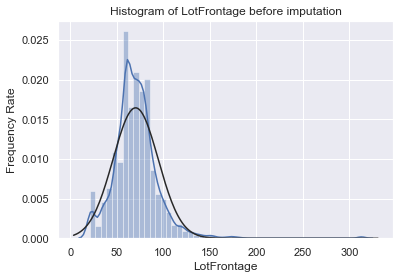

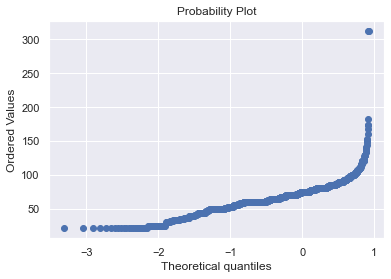

<Figure size 432x288 with 0 Axes>

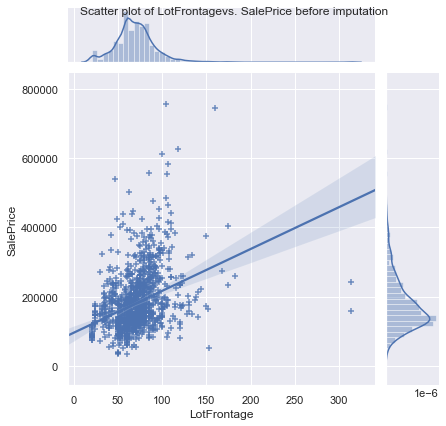

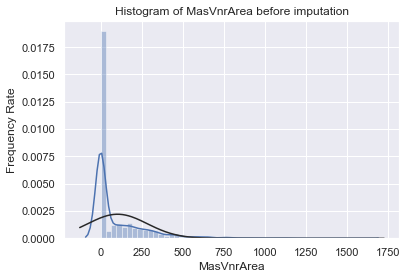

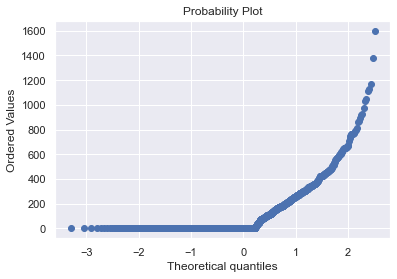

<Figure size 432x288 with 0 Axes>

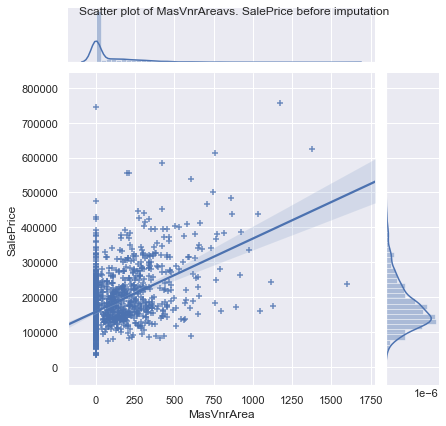

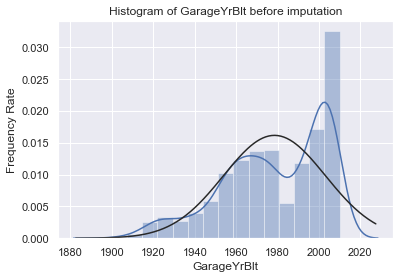

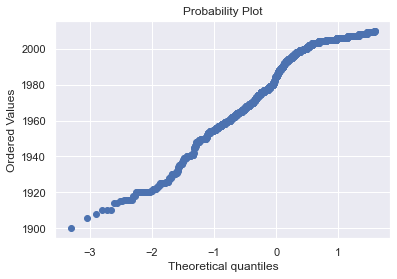

<Figure size 432x288 with 0 Axes>

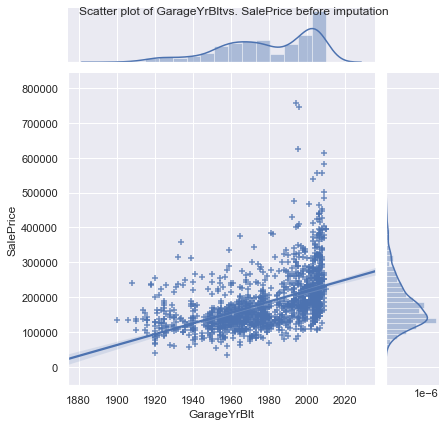

<Figure size 432x288 with 0 Axes>

In [19]:
visualise_floats(dataframe=train
          ,variables=floats_with_nulls
          ,target="SalePrice")

LotFrontage  MasVnrArea  GarageYrBlt
0            65.0       196.0       2003.0
1            80.0         0.0       1976.0
2            68.0       162.0       2001.0
3            60.0         0.0       1998.0
4            84.0       350.0       2000.0
...           ...         ...          ...
1455         62.0         0.0       1999.0
1456         85.0       119.0       1978.0
1457         66.0         0.0       1941.0
1458         68.0         0.0       1950.0
1459         75.0         0.0       1965.0

[1460 rows x 3 columns]

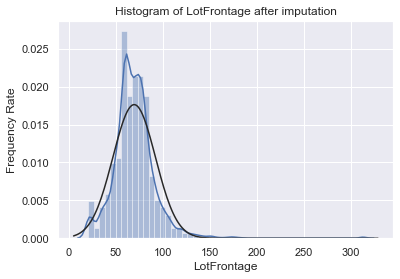

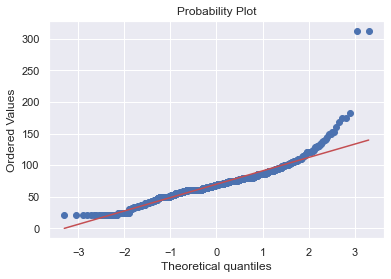

<Figure size 432x288 with 0 Axes>

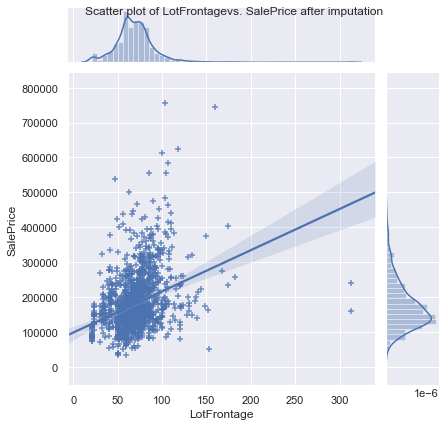

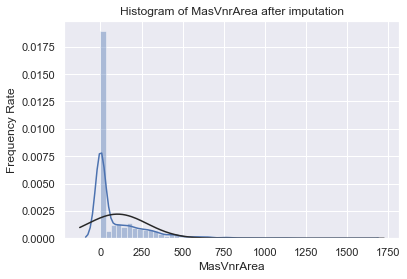

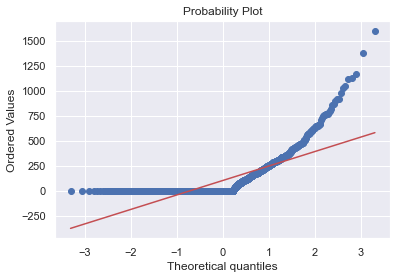

<Figure size 432x288 with 0 Axes>

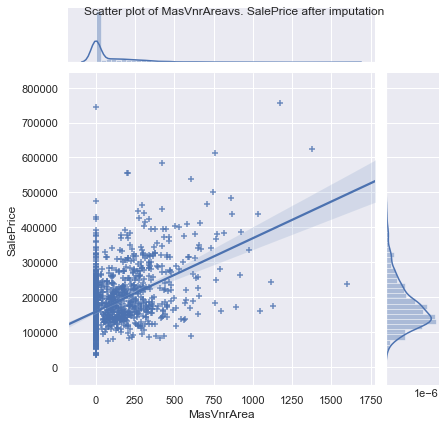

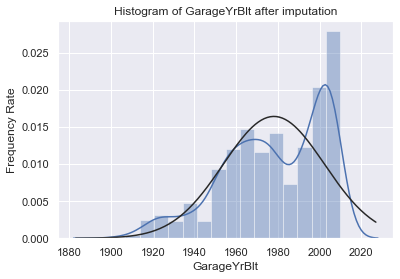

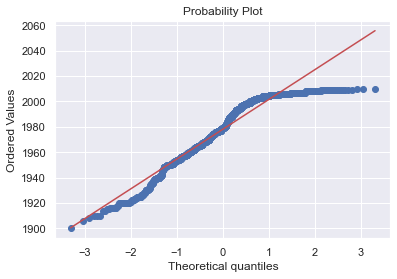

<Figure size 432x288 with 0 Axes>

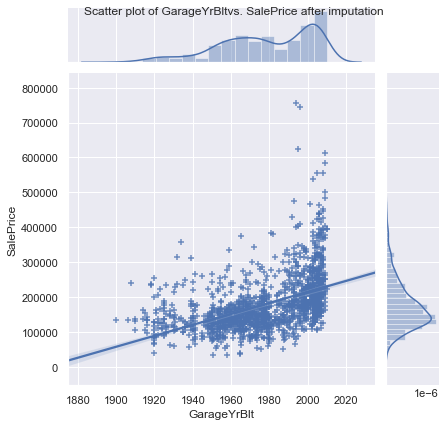

<Figure size 432x288 with 0 Axes>

In [20]:
floats_without_nulls = choose_imputer_and_visualise_floats(dataframe=train
                                                           ,variables=floats_with_nulls
                                                           ,target="SalePrice"
                                                           ,imputer=KNNImputer
                                                           ,strategy=None
                                                           ,weights="distance")
floats_without_nulls

### Summary statistics of Floats before imputation

In [21]:
#train[floats_with_nulls].describe()

In [22]:
before = pd.DataFrame(train[floats_with_nulls].isnull().sum())
before.T

LotFrontage  MasVnrArea  GarageYrBlt
0          259           8           81

### Summary statistics of Floats after imputation

In [23]:
#floats_without_nulls.describe()

In [24]:
after = pd.DataFrame(floats_without_nulls.isnull().sum())
after.T

LotFrontage  MasVnrArea  GarageYrBlt
0            0           0            0

## Category columns imputation

## Find Category columns with null values

In [25]:
category_with_nulls = pd.DataFrame(train.select_dtypes(include=['object']).isnull().sum()) > 0
category_with_nulls = category_with_nulls[category_with_nulls[0] == True].T.columns
category_with_nulls

Index(['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC',
       'Fence', 'MiscFeature'],
      dtype='object')

### Print counts of unique values including Null values

In [26]:
count_unique_values(dataframe=train
                    ,variables=category_with_nulls)

Alley count distinct:
Grvl      50
Pave      41
nan     1369
dtype: int64

MasVnrType count distinct:
None       864
BrkFace    445
Stone      128
BrkCmn      15
nan          8
dtype: int64

BsmtQual count distinct:
TA     649
Gd     618
Ex     121
Fa      35
nan     37
dtype: int64

BsmtCond count distinct:
TA     1311
Gd       65
Fa       45
Po        2
nan      37
dtype: int64

BsmtExposure count distinct:
No     953
Av     221
Gd     134
Mn     114
nan     38
dtype: int64

BsmtFinType1 count distinct:
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
nan     37
dtype: int64

BsmtFinType2 count distinct:
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
nan      38
dtype: int64

Electrical count distinct:
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
nan         1
dtype: int64

FireplaceQu count distinct:
Gd     380
TA     313
Fa      33
Ex      24
Po      20
nan    690
dtype: int64

GarageType count distinct:
Attchd     

Alley MasVnrType BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0     Grvl    BrkFace       Gd       TA           No          GLQ   
1     Grvl       None       Gd       TA           Gd          ALQ   
2     Grvl    BrkFace       Gd       TA           Mn          GLQ   
3     Grvl       None       TA       Gd           No          ALQ   
4     Grvl    BrkFace       Gd       TA           Av          GLQ   
...    ...        ...      ...      ...          ...          ...   
1455  Grvl       None       Gd       TA           No          Unf   
1456  Grvl      Stone       Gd       TA           No          ALQ   
1457  Grvl       None       TA       Gd           No          GLQ   
1458  Grvl       None       TA       TA           Mn          GLQ   
1459  Grvl       None       TA       TA           No          BLQ   

     BsmtFinType2 Electrical FireplaceQu GarageType GarageFinish GarageQual  \
0             Unf      SBrkr          Gd     Attchd          RFn         TA   
1             Unf      SBrkr          TA     Attchd          RFn         TA   
2             Unf      SBrkr          TA     Attchd          RFn         TA   
3             Unf      SBrkr          Gd     Detchd          Unf         TA   
4             Unf      SBrkr          TA     Attchd          RFn         TA   
...           ...        ...         ...        ...          ...        ...   
1455          Unf      SBrkr          TA     Attchd          RFn         TA   
1456          Rec      SBrkr          TA     Attchd          Unf         TA   
1457          Unf      SBrkr          Gd     Attchd          RFn         TA   
1458          Rec      FuseA          Gd     Attchd          Unf         TA   
1459          LwQ      SBrkr          Gd     Attchd          Fin         TA   

     GarageCond PoolQC  Fence MiscFeature  
0            TA     Gd  MnPrv        Shed  
1            TA     Gd  MnPrv        Shed  
2            TA     Gd  MnPrv        Shed  
3            TA     Gd  MnPrv        Shed  
4            TA     Gd  MnPrv        Shed  
...         ...    ...    ...         ...  
1455         TA     Gd  MnPrv        Shed  
1456         TA     Gd  MnPrv        Shed  
1457         TA     Gd  GdPrv        Shed  
1458         TA     Gd  MnPrv        Shed  
1459         TA     Gd  MnPrv        Shed  

[1460 rows x 16 columns]

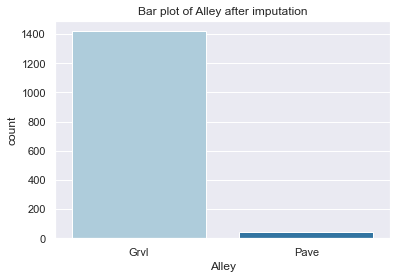

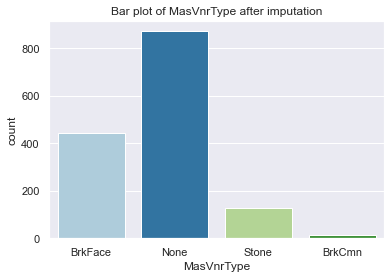

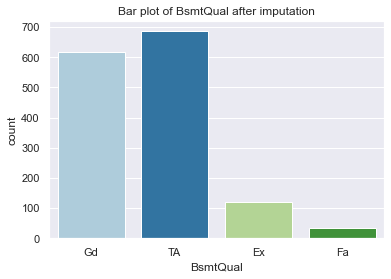

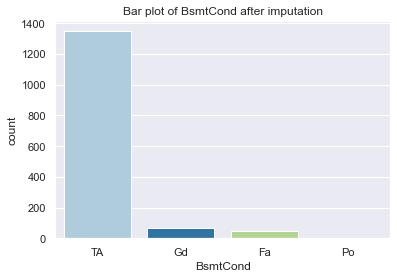

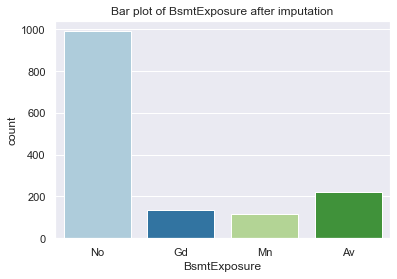

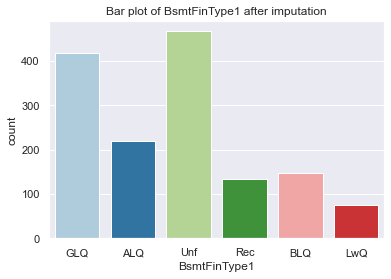

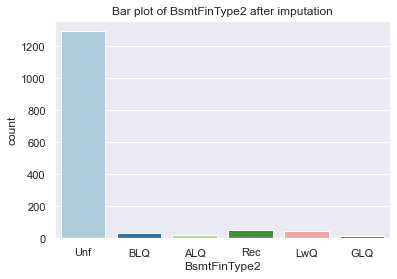

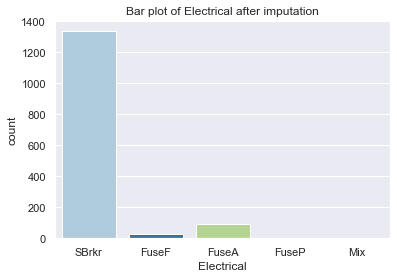

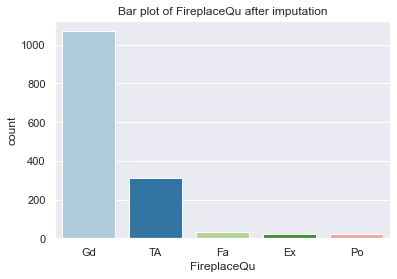

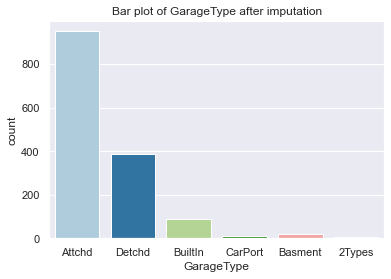

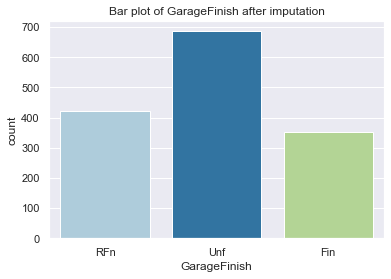

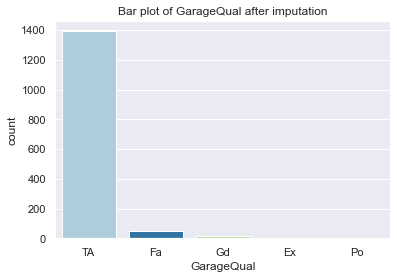

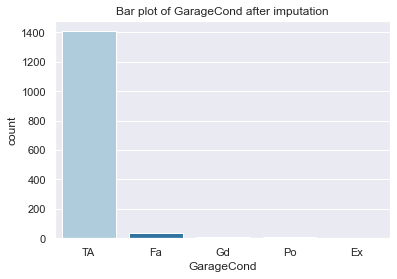

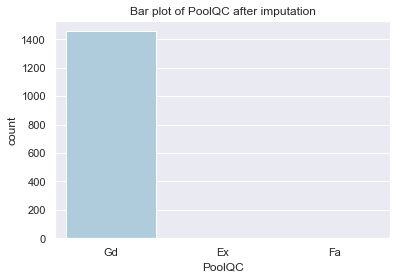

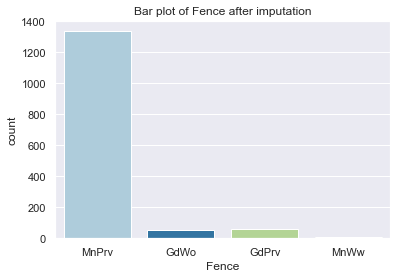

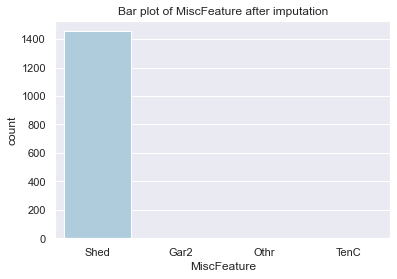

<Figure size 432x288 with 0 Axes>

In [27]:
category_without_nulls = choose_imputer_and_visualise_categories(dataframe=train
                                                                ,variables=category_with_nulls
                                                                ,target=None
                                                                ,imputer=SimpleImputer
                                                                ,strategy="most_frequent"
                                                                ,weights=None)
category_without_nulls

### Summary statistics of Categories before imputation

In [28]:
#train[category_with_nulls].describe()

In [29]:
before = pd.DataFrame(train[category_with_nulls].isnull().sum())
#before.T

### Summary statistics of Categories after imputation

In [30]:
#category_without_nulls.describe()

In [31]:
after = pd.DataFrame(category_without_nulls.isnull().sum())
#after.T

In [32]:
target = train.iloc[:,-1]

In [33]:
target

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, Length: 1460, dtype: float64

## Replacing original columns with imputed one

#### Replacing Floats

In [34]:
floats_without_nulls.columns

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

In [35]:
train[floats_without_nulls.columns] = floats_without_nulls

#### Replacing Categories

In [36]:
category_without_nulls.columns

Index(['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC',
       'Fence', 'MiscFeature'],
      dtype='object')

In [37]:
train[category_without_nulls.columns] = category_without_nulls

## Feature engineering

### Copy of Train

In [38]:
train_imputed = train.copy()
#train_imputed

In [39]:
# preprocessing.PolynomialFeatures([degree, …])
# Generate polynomial and interaction features.

In [40]:
#train.replace([np.inf, -np.inf], np.nan, inplace=True)

In [41]:
#train.fillna(0, inplace=True)
#train

In [42]:
#np.any(np.isnan(train))

In [43]:
#np.all(np.isfinite(train))

In [44]:
features_floats = pd.DataFrame(train.select_dtypes(include=['float64'])).columns[:-1]

In [45]:
features_floats

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [46]:
features_objects = pd.DataFrame(train.select_dtypes(include=['object'])).columns

In [47]:
features_objects

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

### Polynomial

In [48]:
#poly = PolynomialFeatures(2, interaction_only=False)
#fitted = poly.fit_transform(train[features_floats])
poly = PolynomialFeatures(2, interaction_only=False).fit(train[features_floats])
fitted = poly.transform(train[features_floats])

In [49]:
fitted = pd.DataFrame(fitted, columns=poly.get_feature_names())
#fitted

In [50]:
train = pd.concat([train, fitted], axis=1)
#train

In [51]:
train.shape

(1460, 783)

In [52]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       ...
       'x32^2', 'x32 x33', 'x32 x34', 'x32 x35', 'x33^2', 'x33 x34', 'x33 x35',
       'x34^2', 'x34 x35', 'x35^2'],
      dtype='object', length=783)

In [53]:
print(pd.DataFrame(train.columns).count())
print(pd.DataFrame(train.columns).nunique())

0    783
dtype: int64
0    783
dtype: int64


### Deviations

In [54]:
#train.describe()

In [55]:
train.isnull().sum().sort_values(ascending=False)

x35^2         0
x3 x25        0
x4 x15        0
x4 x14        0
x4 x13        0
             ..
x13 x25       0
x13 x24       0
x13 x23       0
x13 x22       0
MSSubClass    0
Length: 783, dtype: int64

In [56]:
train = add_deviation_features(train.drop(columns=["SalePrice"])
                               ,variables_floats=features_floats
                               ,variables_objects=features_objects)
#train

In [57]:
train.shape

(1460, 2330)

In [58]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       ...
       'SaleCondition_DEVIATION_GarageArea',
       'SaleCondition_DEVIATION_WoodDeckSF',
       'SaleCondition_DEVIATION_OpenPorchSF',
       'SaleCondition_DEVIATION_EnclosedPorch',
       'SaleCondition_DEVIATION_3SsnPorch',
       'SaleCondition_DEVIATION_ScreenPorch',
       'SaleCondition_DEVIATION_PoolArea', 'SaleCondition_DEVIATION_MiscVal',
       'SaleCondition_DEVIATION_MoSold', 'SaleCondition_DEVIATION_YrSold'],
      dtype='object', length=2330)

In [59]:
print(pd.DataFrame(train.columns).count())
print(pd.DataFrame(train.columns).nunique())

0    2330
dtype: int64
0    2330
dtype: int64


### Log transforming skew variables

In [60]:
#train.replace([np.inf, -np.inf], np.nan, inplace=True)

In [61]:
#train.fillna(0, inplace=True)
#train

In [62]:
train[train.select_dtypes(include=['uint8']).columns] = train[train.select_dtypes(include=['uint8']).columns].astype(float)

In [63]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 2330 entries, MSSubClass to SaleCondition_DEVIATION_YrSold
dtypes: float64(2287), object(43)
memory usage: 26.0+ MB


In [64]:
mask = train.dtypes == np.float
float_columns = train.columns[mask]

skew_limit = 0.75
skew_values = train[float_columns].skew()
skew_values

MSSubClass                              1.407657
LotFrontage                             2.245801
LotArea                                12.207688
OverallQual                             0.216944
OverallCond                             0.693067
                                         ...    
SaleCondition_DEVIATION_ScreenPorch     4.089773
SaleCondition_DEVIATION_PoolArea       18.340201
SaleCondition_DEVIATION_MiscVal        20.937577
SaleCondition_DEVIATION_MoSold          0.215583
SaleCondition_DEVIATION_YrSold          0.103986
Length: 2287, dtype: float64

In [65]:
skew_columns = (skew_values
                .sort_values(ascending=False)
                .to_frame()
                .rename(columns={0:'Skew'})
                .query('abs(Skew) > {}'.format(skew_limit)))

#skew_columns.T

In [66]:
for column in skew_columns.index.values:
    if column == "SalePrice":
        continue
    train[column] = train[column].apply(np.log1p)

In [67]:
train.shape

(1460, 2330)

In [68]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       ...
       'SaleCondition_DEVIATION_GarageArea',
       'SaleCondition_DEVIATION_WoodDeckSF',
       'SaleCondition_DEVIATION_OpenPorchSF',
       'SaleCondition_DEVIATION_EnclosedPorch',
       'SaleCondition_DEVIATION_3SsnPorch',
       'SaleCondition_DEVIATION_ScreenPorch',
       'SaleCondition_DEVIATION_PoolArea', 'SaleCondition_DEVIATION_MiscVal',
       'SaleCondition_DEVIATION_MoSold', 'SaleCondition_DEVIATION_YrSold'],
      dtype='object', length=2330)

In [69]:
print(pd.DataFrame(train.columns).count())
print(pd.DataFrame(train.columns).nunique())

0    2330
dtype: int64
0    2330
dtype: int64


### Scaler

In [70]:
# preprocessing.RobustScaler(*[, …])
# Scale features using statistics that are robust to outliers.

In [71]:
#train.replace([np.inf, -np.inf], np.nan, inplace=True)

In [72]:
#train.fillna(0, inplace=True)
#train

In [73]:
#features = pd.DataFrame(train.select_dtypes(include=['float64'])).columns

In [74]:
#features

In [75]:
#S = StandardScaler(copy=False)
#fitted = S.fit_transform(train[features_floats])
S = StandardScaler().fit(train[features_floats])
fitted = S.transform(train[features_floats])

In [76]:
fitted.shape

(1460, 36)

In [77]:
fitted = pd.DataFrame(fitted, columns=features_floats)

In [78]:
#train = pd.concat([train, fitted], axis=1)
train.update(fitted)
train

MSSubClass MSZoning  LotFrontage   LotArea Street Alley LotShape  \
0       0.424462       RL    -0.056154 -0.133270   Pave  Grvl      Reg   
1      -1.125202       RL     0.577512  0.113413   Pave  Grvl      Reg   
2       0.424462       RL     0.081387  0.420049   Pave  Grvl      IR1   
3       0.645073       RL    -0.299914  0.103317   Pave  Grvl      IR1   
4       0.424462       RL     0.726657  0.878431   Pave  Grvl      IR1   
...          ...      ...          ...       ...    ...   ...      ...   
1455    0.424462       RL    -0.200094 -0.259231   Pave  Grvl      Reg   
1456   -1.125202       RL     0.762846  0.725429   Pave  Grvl      Reg   
1457    0.645073       RL    -0.009625 -0.002359   Pave  Grvl      Reg   
1458   -1.125202       RL     0.081387  0.136833   Pave  Grvl      Reg   
1459   -1.125202       RL     0.380365  0.180116   Pave  Grvl      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story     0.651479    -0.517200   1.050994   
1          Norm     1Fam     1Story    -0.071836     2.179628   0.156734   
2          Norm     1Fam     2Story     0.651479    -0.517200   0.984752   
3          Norm     1Fam     2Story     0.651479    -0.517200  -1.863632   
4          Norm     1Fam     2Story     1.374795    -0.517200   0.951632   
...         ...      ...        ...          ...          ...        ...   
1455       Norm     1Fam     2Story    -0.071836    -0.517200   0.918511   
1456       Norm     1Fam     1Story    -0.071836     0.381743   0.222975   
1457       Norm     1Fam     2Story     0.651479     3.078570  -1.002492   
1458       Norm     1Fam     1Story    -0.795151     0.381743  -0.704406   
1459       Norm     1Fam     1Story    -0.795151     0.381743  -0.207594   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0         0.878668     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1        -0.429577     Gable  CompShg     MetalSd     MetalSd       None   
2         0.830215     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3        -0.720298     Gable  CompShg     Wd Sdng     Wd Shng       None   
4         0.733308     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
1455      0.733308     Gable  CompShg     VinylSd     VinylSd       None   
1456      0.151865     Gable  CompShg     Plywood     Plywood      Stone   
1457      1.024029     Gable  CompShg     CemntBd     CmentBd       None   
1458      0.539493       Hip  CompShg     MetalSd     MetalSd       None   
1459     -0.962566     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0       1.195433        Gd        TA      PConc       Gd       TA   
1      -0.814447        TA        TA     CBlock       Gd       TA   
2       1.123360        Gd        TA      PConc       Gd       TA   
3      -0.814447        TA        TA     BrkTil       TA       Gd   
4       1.415162        Gd        TA      PConc       Gd 

In [79]:
train.shape

(1460, 2330)

In [80]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       ...
       'SaleCondition_DEVIATION_GarageArea',
       'SaleCondition_DEVIATION_WoodDeckSF',
       'SaleCondition_DEVIATION_OpenPorchSF',
       'SaleCondition_DEVIATION_EnclosedPorch',
       'SaleCondition_DEVIATION_3SsnPorch',
       'SaleCondition_DEVIATION_ScreenPorch',
       'SaleCondition_DEVIATION_PoolArea', 'SaleCondition_DEVIATION_MiscVal',
       'SaleCondition_DEVIATION_MoSold', 'SaleCondition_DEVIATION_YrSold'],
      dtype='object', length=2330)

In [81]:
print(pd.DataFrame(train.columns).count())
print(pd.DataFrame(train.columns).nunique())

0    2330
dtype: int64
0    2330
dtype: int64


### DUMMY VARIABLES

In [82]:
categories = pd.DataFrame(train.select_dtypes(include=['object']))
#categories

In [83]:
#categories.describe()

### One-hot encoding

In [84]:
one_hot_encode_cols = categories.dtypes[categories.dtypes == np.object]
one_hot_encode_cols = one_hot_encode_cols.index.tolist()
#pd.DataFrame(one_hot_encode_cols).T

In [85]:
train = pd.get_dummies(data=train
                       ,columns=one_hot_encode_cols
                       ,drop_first=True)

In [86]:
train.shape

(1460, 2496)

In [87]:
train.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=2496)

In [88]:
print(pd.DataFrame(train.columns).count())
print(pd.DataFrame(train.columns).nunique())

0    2496
dtype: int64
0    2496
dtype: int64


## Feature selection

In [89]:
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html
#https://scikit-learn.org/stable/modules/feature_selection.html#variance-threshold

In [90]:
variables=train.columns
variables

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=2496)

### Variance Threshold

In [91]:
#pd.DataFrame(train.var().sort_values(ascending=True)).T

In [92]:
train.replace([np.inf, -np.inf], np.nan, inplace=True)

In [93]:
train.fillna(0, inplace=True)
#train

In [94]:
from sklearn.feature_selection import VarianceThreshold
X = train
#vt = VarianceThreshold(threshold=(.8 * (1 - .8)))
vt = VarianceThreshold(threshold=0.25)
X_vt = vt.fit_transform(X)
print(vt.get_params())
print(vt.get_support(indices=True))

{'threshold': 0.25}
[   0    1    2 ... 2280 2285 2286]


In [95]:
train_reduced_by_variance = train[train.columns[vt.get_support(indices=True)]]
#train_reduced_by_variance

In [96]:
train_reduced_by_variance.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleCondition_DEVIATION_TotRmsAbvGrd',
       'SaleCondition_DEVIATION_Fireplaces',
       'SaleCondition_DEVIATION_GarageYrBlt',
       'SaleCondition_DEVIATION_GarageCars',
       'SaleCondition_DEVIATION_GarageArea',
       'SaleCondition_DEVIATION_WoodDeckSF',
       'SaleCondition_DEVIATION_OpenPorchSF',
       'SaleCondition_DEVIATION_EnclosedPorch',
       'SaleCondition_DEVIATION_MoSold', 'SaleCondition_DEVIATION_YrSold'],
      dtype='object', length=1841)

In [97]:
train = train_reduced_by_variance

In [98]:
train.shape

(1460, 1841)

In [99]:
train.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleCondition_DEVIATION_TotRmsAbvGrd',
       'SaleCondition_DEVIATION_Fireplaces',
       'SaleCondition_DEVIATION_GarageYrBlt',
       'SaleCondition_DEVIATION_GarageCars',
       'SaleCondition_DEVIATION_GarageArea',
       'SaleCondition_DEVIATION_WoodDeckSF',
       'SaleCondition_DEVIATION_OpenPorchSF',
       'SaleCondition_DEVIATION_EnclosedPorch',
       'SaleCondition_DEVIATION_MoSold', 'SaleCondition_DEVIATION_YrSold'],
      dtype='object', length=1841)

In [100]:
print(pd.DataFrame(train.columns).count())
print(pd.DataFrame(train.columns).nunique())

0    1841
dtype: int64
0    1841
dtype: int64


## Tree-based feature selection

In [101]:
from sklearn.tree import ExtraTreeRegressor
#from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
X = train
y = target
X.shape

clf = ExtraTreeRegressor()
clf = clf.fit(X, y)
#clf.feature_importances_  

model = SelectFromModel(clf, prefit=True)
#X_new = model.transform(X)
#X_new.shape

In [102]:
train_reduced_by_tree = train[train.columns[model.get_support(indices=True)]]

In [103]:
train = train_reduced_by_tree

In [104]:
train.shape

(1460, 91)

In [105]:
train.columns

Index(['x2', 'x11', 'x0 x4', 'x2 x4', 'x2 x11', 'x2 x15', 'x2 x24', 'x3 x6',
       'x3 x11', 'x3 x15', 'x3 x18', 'x3 x20', 'x3 x25', 'x3 x34', 'x4 x11',
       'x4 x14', 'x4 x26', 'x5 x6', 'x5 x24', 'x6 x11', 'x8 x15', 'x10 x16',
       'x10 x23', 'x11 x15', 'x12 x13', 'x15^2', 'x15 x25', 'x17 x26', 'x18^2',
       'x18 x23', 'x22 x23', 'Alley_DEVIATION_GarageCars',
       'LotShape_DEVIATION_BsmtFinSF1', 'LandContour_DEVIATION_GarageCars',
       'LandContour_DEVIATION_OpenPorchSF', 'LotConfig_DEVIATION_YearBuilt',
       'LotConfig_DEVIATION_BsmtUnfSF', 'LotConfig_DEVIATION_TotalBsmtSF',
       'Neighborhood_DEVIATION_BsmtUnfSF', 'Neighborhood_DEVIATION_GarageCars',
       'Neighborhood_DEVIATION_GarageArea',
       'Condition2_DEVIATION_TotRmsAbvGrd', 'BldgType_DEVIATION_YearRemodAdd',
       'RoofStyle_DEVIATION_YearBuilt', 'RoofStyle_DEVIATION_GrLivArea',
       'RoofMatl_DEVIATION_GrLivArea', 'Exterior1st_DEVIATION_OverallQual',
       'Exterior1st_DEVIATION_BsmtFinSF1', 'Exteri

In [106]:
print(pd.DataFrame(train.columns).count())
print(pd.DataFrame(train.columns).nunique())

0    91
dtype: int64
0    91
dtype: int64


### Correlations

In [107]:
# plt.subplots(figsize=(30,30))
# matrix = np.triu(train.corr())
# sns_plot = sns.heatmap(train.corr(), annot=True, mask=matrix)
# fig = sns_plot.get_figure()
# fig.savefig("corr_matrix.jpg")

### Corralation against Target

In [108]:
target_train = pd.concat([target,train],axis=1)

In [109]:
corr_target = target_train[target_train.columns].corr()['SalePrice'][:-1]
pd.DataFrame(corr_target.sort_values(ascending=False)).T

SalePrice    x3 x25     x3 x6    x3 x15    x3 x18  \
SalePrice        1.0  0.809859  0.794862  0.792136  0.760133   

           CentralAir_DEVIATION_OverallQual     x15^2  \
SalePrice                            0.7506  0.695118   

           Exterior1st_DEVIATION_OverallQual  \
SalePrice                           0.676547   

           Exterior2nd_DEVIATION_OverallQual  Alley_DEVIATION_GarageCars  \
SalePrice                           0.672828                    0.639176   

           LandContour_DEVIATION_GarageCars  \
SalePrice                          0.625275   

           BsmtFinType2_DEVIATION_GarageArea    x2 x15    x3 x20     x18^2  \
SalePrice                           0.614561  0.604957  0.593554  0.577302   

              x5 x6   x18 x23    x4 x26  PoolQC_DEVIATION_FullBath    x5 x24  \
SalePrice  0.576788  0.571792  0.554291                   0.552084  0.533876   

           Condition2_DEVIATION_TotRmsAbvGrd   x22 x23  \
SalePrice                           0.531984  0.529779   

           HeatingQC_DEVIATION_GarageCars  MiscFeature_DEVIATION_YearBuilt  \
SalePrice                        0.522842                         0.521689   

           RoofStyle_DEVIATION_YearBuilt  LotConfig_DEVIATION_YearBuilt  \
SalePrice                       0.519596                       0.518848   

           BldgType_DEVIATION_YearRemodAdd  PavedDrive_DEVIATION_GrLivArea  \
SalePrice                         0.495137                        0.483914   

            x10 x23  RoofMatl_DEVIATION_GrLivArea  \
SalePrice  0.483301                      0.479494   

           Heating_DEVIATION_GarageYrBlt  BsmtFinType2_DEVIATION_TotalBsmtSF  \
SalePrice                       0.474645                            0.473226   

           MiscFeature_DEVIATION_TotalBsmtSF  \
SalePrice                           0.471549   

           GarageFinish_DEVIATION_Fireplaces  RoofStyle_DEVIATION_GrLivArea  \
SalePrice                           0.459491                       0.457752   

           LotConfig_DEVIATION_TotalBsmtSF  ExterCond_DEVIATION_TotalBsmtSF  \
SalePrice                         0.457078                         0.450837   

            x15 x25  SaleType_DEVIATION_GrLivArea  \
SalePrice  0.445609                      0.433965   

           BsmtExposure_DEVIATION_GarageYrBlt  \
SalePrice                             0.43176   

           LandContour_DEVIATION_OpenPorchSF  BsmtFinType2_DEVIATION_1stFlrSF  \
SalePrice                           0.412442                         0.409547   

           CentralAir_DEVIATION_TotalBsmtSF    x2 x24    x3 x11  \
SalePrice                          0.403063  0.399948  0.399143   

           Fence_DEVIATION_1stFlrSF        x2  PavedDrive_DEVIATION_LotArea  \
SalePrice                  0.392008  0.388528                      0.384924   

           Functional_DEVIATION_LotArea  GarageType_DEVIATION_Fireplaces  \
SalePrice                       0.38069                         0.374059   

           Exterior2nd_DEVIATION_MasVnrArea  BsmtQual_DEVIATION_GarageArea  \
SalePrice                          0.369319                       0.348305   

              x2 x4  SaleCondition_DEVIATION_YearBuilt  \
SalePrice  0.345942                           0.337137   

           MiscFeature_DEVIATION_WoodDeckSF   x11 x15       x11  \
SalePrice                          0.336733  0.335423  0.325883   

           BsmtFinType1_DEVIATION_TotalBsmtSF   x3 x34  \
SalePrice                            0.324238  0.32314   

           GarageType_DEVIATION_MasVnrArea    x2 x11  \
SalePrice                         0.321837  0.301704   

           Neighborhood_DEVIATION_GarageCars  \
SalePrice                           0.298368   

           Neighborhood_DEVIATION_GarageArea  \
SalePrice                            0.29607   

           Exterior2nd_DEVIATION_GarageYrBlt    x4 x11   x10 x16  \
SalePrice                           0.287991  0.285773  0.270781   

           GarageFinish_DEVIATION_TotalBsmtSF  LotSha

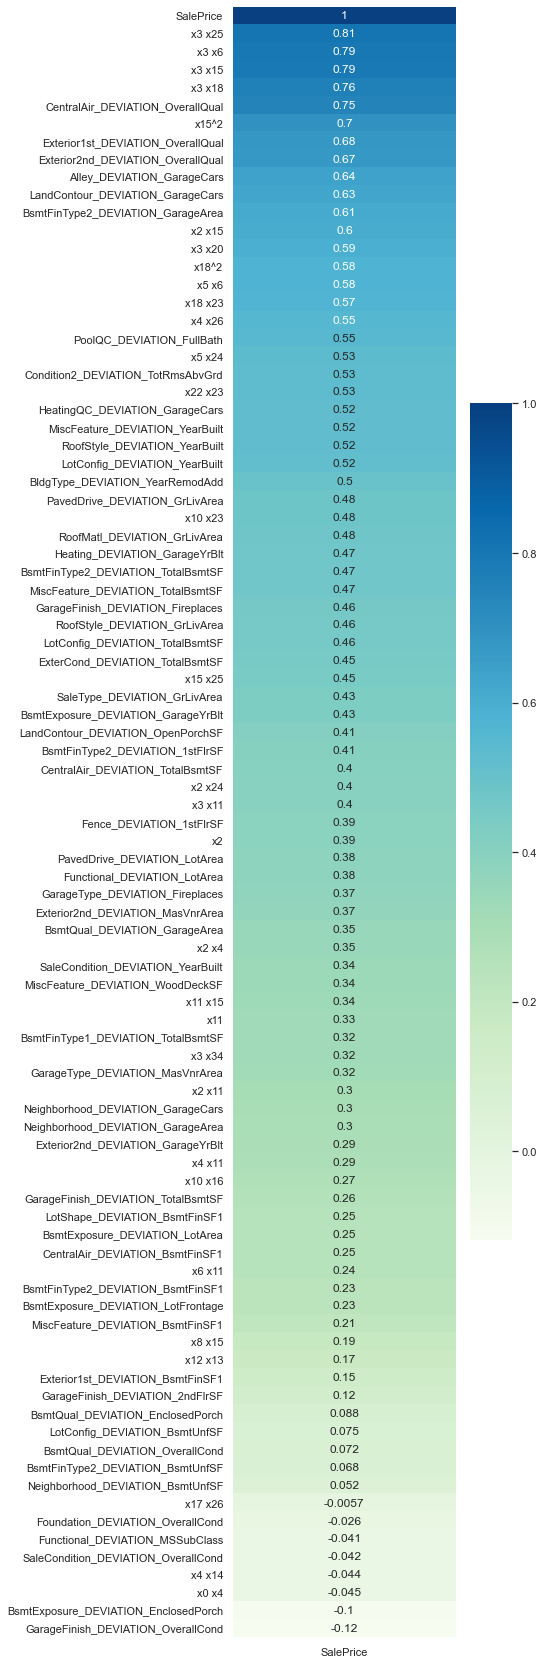

In [110]:
plt.subplots(figsize=(5,30))
sns_plot = sns.heatmap(corr_target.sort_values(ascending=False).to_frame(),annot=True, annot_kws={'size':12},cmap="GnBu")
plt.show()
fig = sns_plot.get_figure()
fig.savefig("corr_target.jpg")

### Pairplot

In [111]:
# plt.subplots(figsize=(30,30))
# sns.set_context('notebook')
# sns.set_style('white')
# fig = sns.pairplot(target_train)
# fig.savefig("pairplot.jpg")
# plt.clf()

In [112]:
#Image(filename='pairplot.jpg') # Show pairplot as image

# Test set cleaning and feature engineering

In [113]:
test = pd.read_csv('test.csv')
test_index = test["Id"]
test_index

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [114]:
test = test.drop(columns="Id", axis=1)
#test

In [115]:
#test.describe()

In [116]:
floats_with_nulls = pd.DataFrame(test.select_dtypes(include=['float64']).isnull().sum()) > 0
floats_with_nulls = floats_with_nulls[floats_with_nulls[0] == True].T.columns
floats_with_nulls

Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea'],
      dtype='object')

LotFrontage  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0            80.0         0.0       468.0       144.0      270.0        882.0   
1            81.0       108.0       923.0         0.0      406.0       1329.0   
2            74.0         0.0       791.0         0.0      137.0        928.0   
3            78.0        20.0       602.0         0.0      324.0        926.0   
4            43.0         0.0       263.0         0.0     1017.0       1280.0   
...           ...         ...         ...         ...        ...          ...   
1454         21.0         0.0         0.0         0.0      546.0        546.0   
1455         21.0         0.0       252.0         0.0      294.0        546.0   
1456        160.0         0.0      1224.0         0.0        0.0       1224.0   
1457         62.0         0.0       337.0         0.0      575.0        912.0   
1458         74.0        94.0       758.0         0.0      238.0        996.0   

      BsmtFullBath  BsmtHalfBath  GarageYrBlt  GarageCars  GarageArea  
0              0.0           0.0  1961.000000         1.0       730.0  
1              0.0           0.0  1958.000000         1.0       312.0  
2              0.0           0.0  1997.000000         2.0       482.0  
3              0.0           0.0  1998.000000         2.0       470.0  
4              0.0           0.0  1992.000000         2.0       506.0  
...            ...           ...          ...         ...         ...  
1454           0.0           0.0  1933.278445         0.0         0.0  
1455           0.0           0.0  1970.000000         1.0       286.0  
1456           1.0           0.0  1960.000000         2.0       576.0  
1457           0.0           1.0  1930.271361         0.0         0.0  
1458           0.0           0.0  1993.000000         3.0       650.0  

[1459 rows x 11 columns]

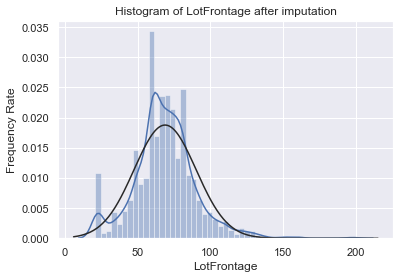

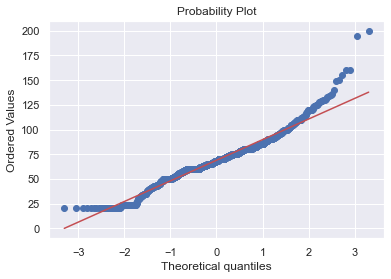

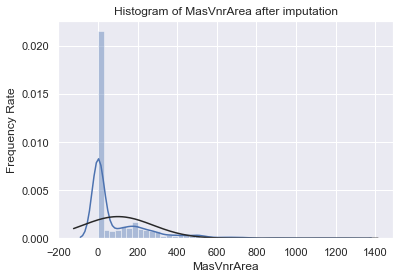

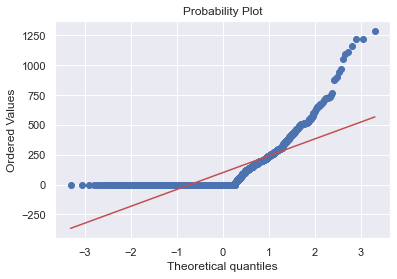

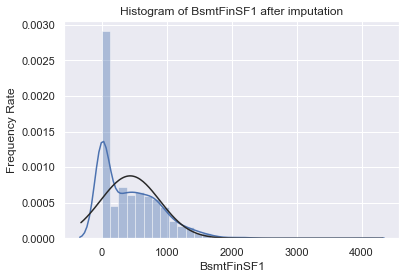

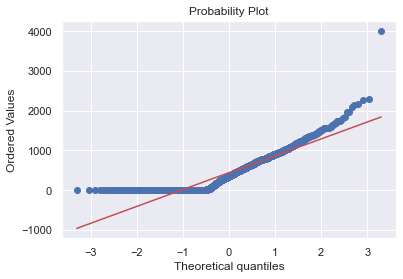

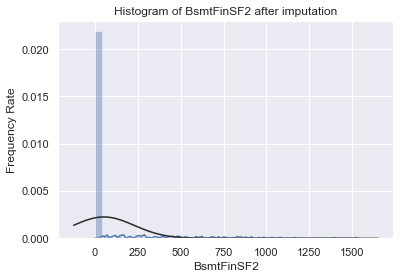

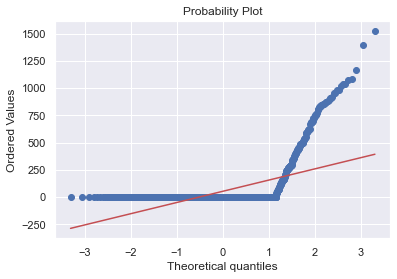

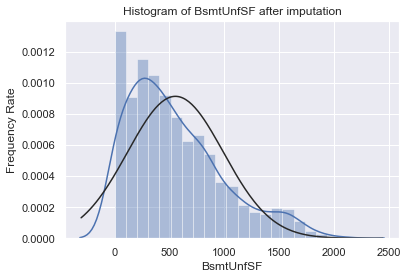

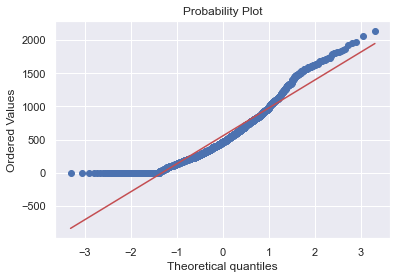

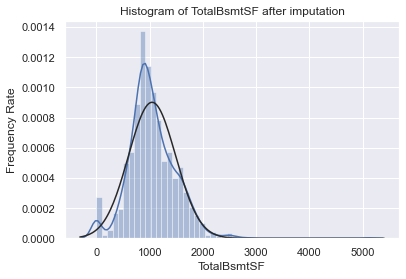

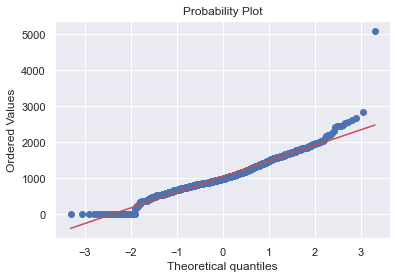

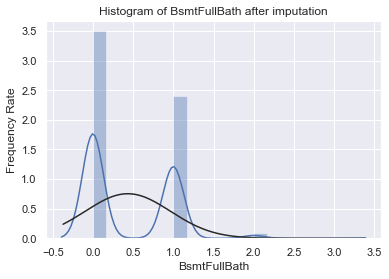

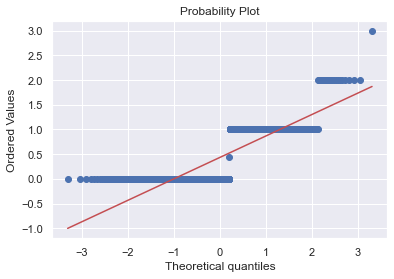

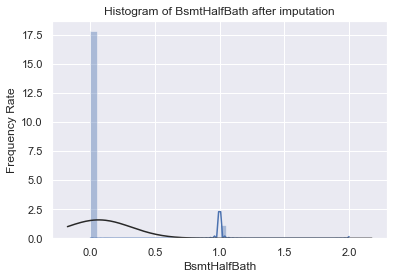

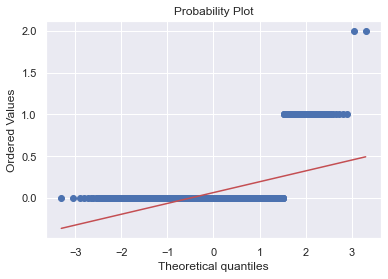

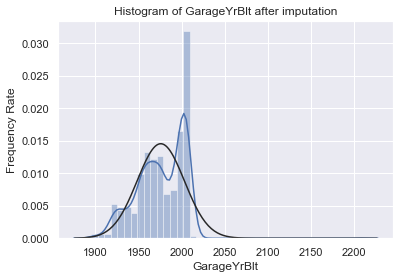

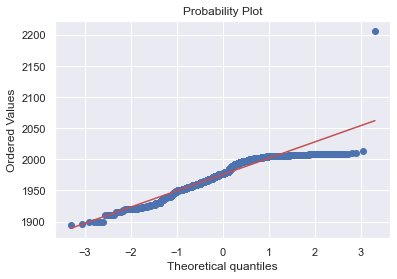

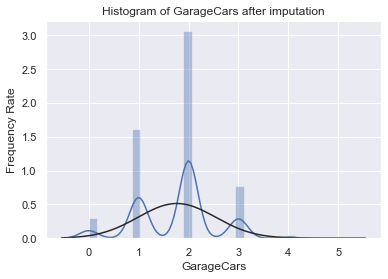

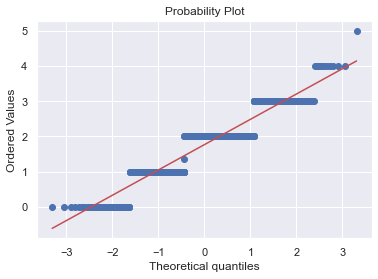

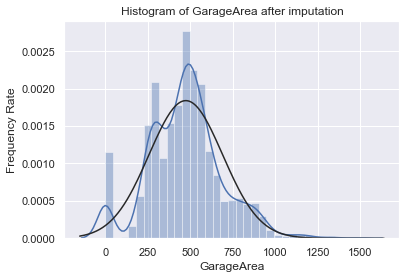

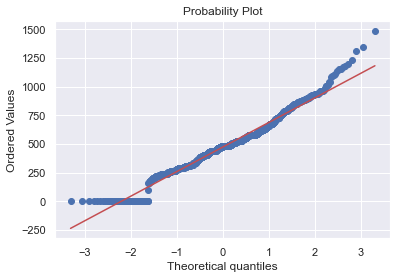

<Figure size 432x288 with 0 Axes>

In [117]:
floats_without_nulls = choose_imputer_and_visualise_floats(dataframe=test
                                                           ,variables=floats_with_nulls
                                                           ,target=None
                                                           ,imputer=KNNImputer
                                                           ,strategy=None
                                                           ,weights="distance")
floats_without_nulls

In [118]:
#pd.DataFrame(floats_without_nulls.isnull().sum() > 0).T

In [119]:
category_with_nulls = pd.DataFrame(test.select_dtypes(include=['object']).isnull().sum()) > 0
category_with_nulls = category_with_nulls[category_with_nulls[0] == True].T.columns
category_with_nulls

Index(['MSZoning', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType'],
      dtype='object')

MSZoning Alley Utilities Exterior1st Exterior2nd MasVnrType BsmtQual  \
0          RH  Grvl    AllPub     VinylSd     VinylSd       None       TA   
1          RL  Grvl    AllPub     Wd Sdng     Wd Sdng    BrkFace       TA   
2          RL  Grvl    AllPub     VinylSd     VinylSd       None       Gd   
3          RL  Grvl    AllPub     VinylSd     VinylSd    BrkFace       TA   
4          RL  Grvl    AllPub     HdBoard     HdBoard       None       Gd   
...       ...   ...       ...         ...         ...        ...      ...   
1454       RM  Grvl    AllPub     CemntBd     CmentBd       None       TA   
1455       RM  Grvl    AllPub     CemntBd     CmentBd       None       TA   
1456       RL  Grvl    AllPub     VinylSd     VinylSd       None       TA   
1457       RL  Grvl    AllPub     HdBoard     Wd Shng       None       Gd   
1458       RL  Grvl    AllPub     HdBoard     HdBoard    BrkFace       Gd   

     BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 KitchenQual Functional  \
0          TA           No          Rec          LwQ          TA        Typ   
1          TA           No          ALQ          Unf          Gd        Typ   
2          TA           No          GLQ          Unf          TA        Typ   
3          TA           No          GLQ          Unf          Gd        Typ   
4          TA           No          ALQ          Unf          Gd        Typ   
...       ...          ...          ...          ...         ...        ...   
1454       TA           No          Unf          Unf          TA        Typ   
1455       TA           No          Rec          Unf          TA        Typ   
1456       TA           No          ALQ          Unf          TA        Typ   
1457       TA           Av          GLQ          Unf          TA        Typ   
1458       TA           Av          LwQ          Unf          TA        Typ   

     FireplaceQu GarageType GarageFinish GarageQual GarageCond PoolQC  Fence  \
0             Gd     Attchd          Unf         TA         TA     Ex  MnPrv   
1             Gd     Attchd          Unf         TA         TA     Ex  MnPrv   
2             TA     Attchd          Fin         TA         TA     Ex  MnPrv   
3             Gd     Attchd          Fin         TA         TA     Ex  MnPrv   
4             Gd     Attchd          RFn         TA         TA     Ex  MnPrv   
...          ...        ...          ...        ...        ...    ...    ...   
1454          Gd     Attchd          Unf         TA         TA     Ex  MnPrv   
1455          Gd    CarPort          Unf         TA         TA     Ex  MnPrv   
1456          TA     Detchd          Unf         TA         TA     Ex  MnPrv   
1457          Gd     Attchd          Unf         TA         TA     Ex  MnPrv   
1458          TA     Attchd          Fin         TA         TA     Ex  MnPrv   

     MiscFeature SaleType  
0           Shed       WD  
1           Gar2       WD  
2           Shed       WD  
3           Shed       WD  
4           Shed       WD  
...          ...      ...  
1454        Shed       WD  
1455        Shed       WD  
1456        Shed       WD  
1457        Shed       WD  
1458        Shed       WD  

[1459 rows x 22 columns]

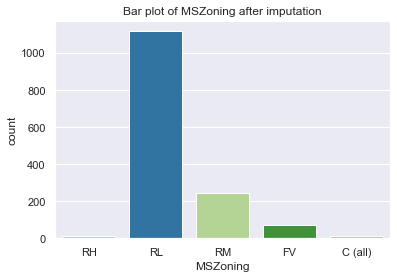

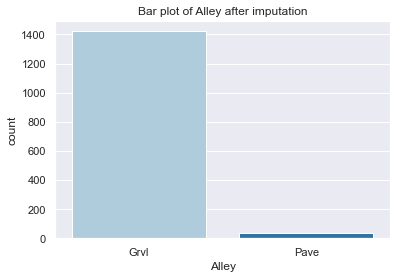

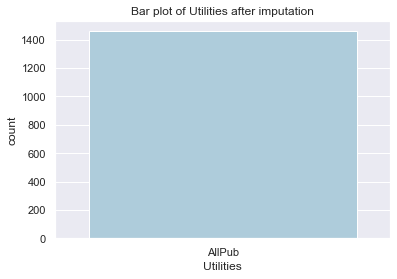

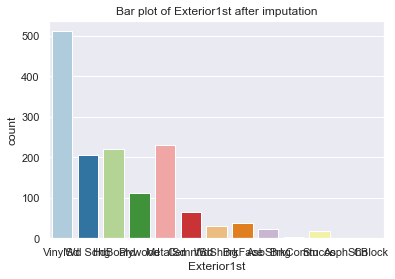

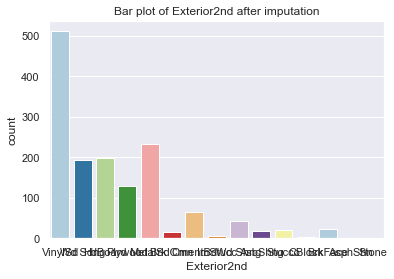

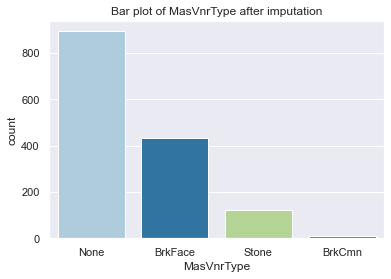

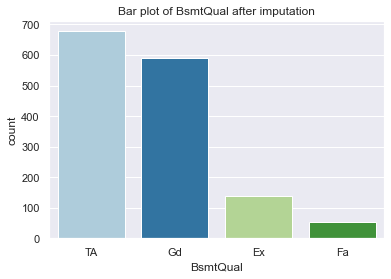

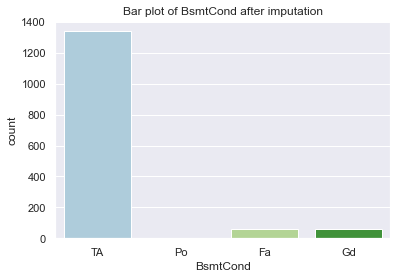

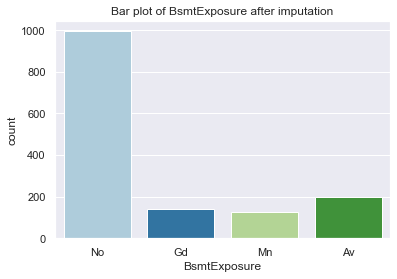

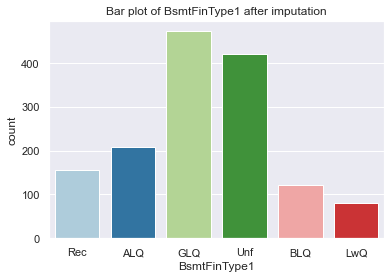

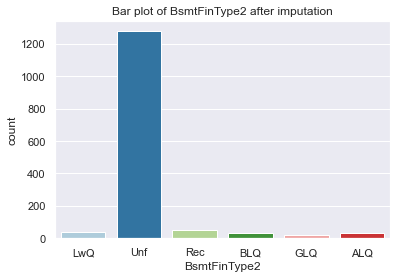

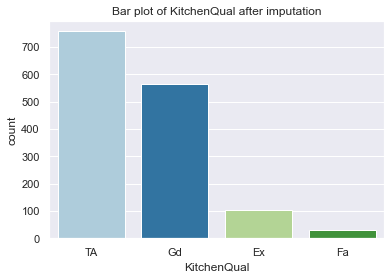

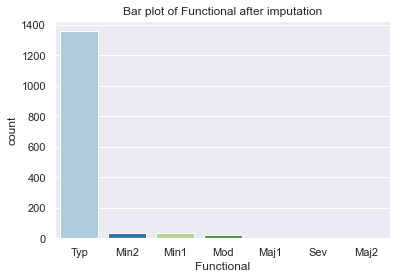

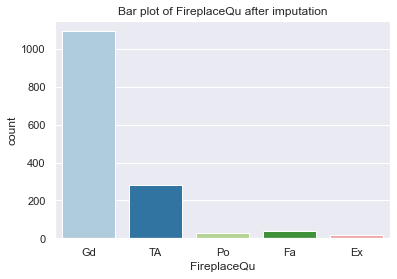

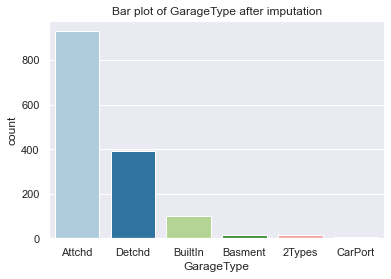

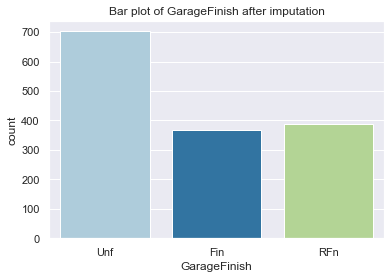

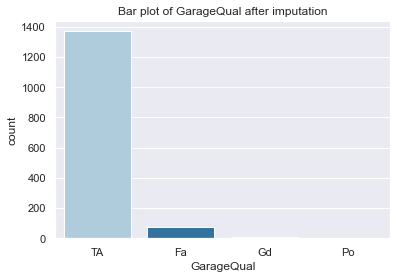

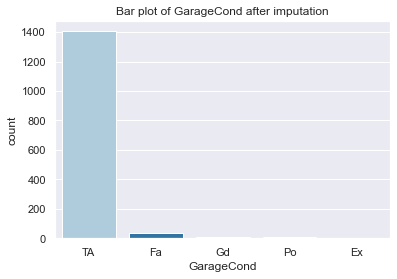

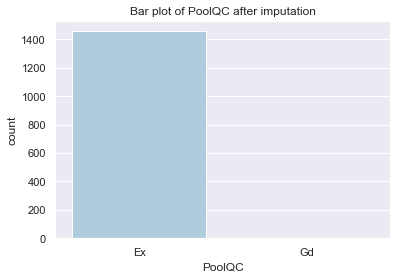

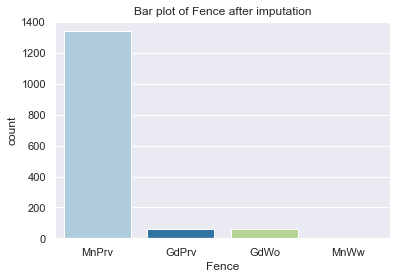

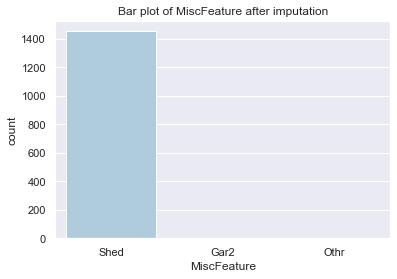

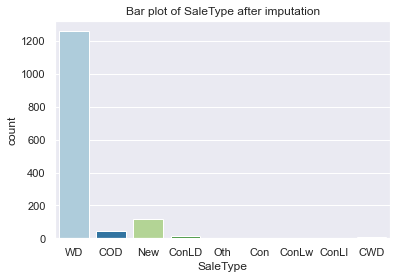

<Figure size 432x288 with 0 Axes>

In [120]:
category_without_nulls = choose_imputer_and_visualise_categories(dataframe=test
                                                                ,variables=category_with_nulls
                                                                ,target=None
                                                                ,imputer=SimpleImputer
                                                                ,strategy="most_frequent"
                                                                ,weights=None)
category_without_nulls

In [121]:
#pd.DataFrame(category_without_nulls.isnull().sum() > 0).T

### Replace columns with nulls by columns with imputed values

In [122]:
test[floats_without_nulls.columns] = floats_without_nulls
#test

In [123]:
test[category_without_nulls.columns] = category_without_nulls
#test

In [124]:
test.shape

(1459, 79)

In [125]:
test[test.select_dtypes(include=['int64', "uint8"]).columns] = test[test.select_dtypes(include=['int64', "uint8"]).columns].astype(float)

In [126]:
#test.info()

In [127]:
#features_floats = pd.DataFrame(test.select_dtypes(include=['float64'])).columns
features_floats

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [128]:
#features_objects = pd.DataFrame(test.select_dtypes(include=['object'])).columns
features_objects

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

## Polynomials

In [129]:
#poly = PolynomialFeatures(2, interaction_only=False)
fitted = poly.transform(test[features_floats])

In [130]:
fitted = pd.DataFrame(fitted, columns=poly.get_feature_names())
#fitted

In [131]:
test = pd.concat([test, fitted], axis=1)
#test

In [132]:
test.shape

(1459, 782)

In [133]:
test.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       ...
       'x32^2', 'x32 x33', 'x32 x34', 'x32 x35', 'x33^2', 'x33 x34', 'x33 x35',
       'x34^2', 'x34 x35', 'x35^2'],
      dtype='object', length=782)

In [134]:
print(pd.DataFrame(test.columns).count())
print(pd.DataFrame(test.columns).nunique())

0    782
dtype: int64
0    782
dtype: int64


## Deviations

In [135]:
test = add_deviation_features(test
                               ,variables_floats=features_floats
                               ,variables_objects=features_objects)
#test

In [136]:
# test.fillna(0, inplace=True)
#test

In [137]:
test.shape

(1459, 2330)

In [138]:
test.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       ...
       'SaleCondition_DEVIATION_GarageArea',
       'SaleCondition_DEVIATION_WoodDeckSF',
       'SaleCondition_DEVIATION_OpenPorchSF',
       'SaleCondition_DEVIATION_EnclosedPorch',
       'SaleCondition_DEVIATION_3SsnPorch',
       'SaleCondition_DEVIATION_ScreenPorch',
       'SaleCondition_DEVIATION_PoolArea', 'SaleCondition_DEVIATION_MiscVal',
       'SaleCondition_DEVIATION_MoSold', 'SaleCondition_DEVIATION_YrSold'],
      dtype='object', length=2330)

In [139]:
print(pd.DataFrame(test.columns).count())
print(pd.DataFrame(test.columns).nunique())

0    2330
dtype: int64
0    2330
dtype: int64


## Log tranformation

In [140]:
mask = test.dtypes == np.float
float_columns = test.columns[mask]

skew_limit = 0.75
skew_values = test[float_columns].skew()
skew_values

MSSubClass                              1.346690
LotFrontage                             0.623983
LotArea                                 3.115217
OverallQual                             0.181196
OverallCond                             0.449165
                                         ...    
SaleCondition_DEVIATION_ScreenPorch     3.846291
SaleCondition_DEVIATION_PoolArea       18.337267
SaleCondition_DEVIATION_MiscVal        16.428941
SaleCondition_DEVIATION_MoSold          0.179839
SaleCondition_DEVIATION_YrSold          0.179440
Length: 2287, dtype: float64

In [141]:
skew_columns = (skew_values
                .sort_values(ascending=False)
                .to_frame()
                .rename(columns={0:'Skew'})
                .query('abs(Skew) > {}'.format(skew_limit)))

#skew_columns.T

In [142]:
for column in skew_columns.index.values:
    if column == "SalePrice":
        continue
    test[column] = test[column].apply(np.log1p)

In [143]:
test.shape

(1459, 2330)

In [144]:
test.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       ...
       'SaleCondition_DEVIATION_GarageArea',
       'SaleCondition_DEVIATION_WoodDeckSF',
       'SaleCondition_DEVIATION_OpenPorchSF',
       'SaleCondition_DEVIATION_EnclosedPorch',
       'SaleCondition_DEVIATION_3SsnPorch',
       'SaleCondition_DEVIATION_ScreenPorch',
       'SaleCondition_DEVIATION_PoolArea', 'SaleCondition_DEVIATION_MiscVal',
       'SaleCondition_DEVIATION_MoSold', 'SaleCondition_DEVIATION_YrSold'],
      dtype='object', length=2330)

In [145]:
print(pd.DataFrame(test.columns).count())
print(pd.DataFrame(test.columns).nunique())

0    2330
dtype: int64
0    2330
dtype: int64


## Scaling

In [146]:
test.replace([np.inf, -np.inf], np.nan, inplace=True)

In [147]:
#S = StandardScaler(copy=False)
fitted = S.transform(test[features_floats])

In [148]:
fitted = pd.DataFrame(fitted,columns=features_floats)

In [149]:
#test = pd.concat([test, fitted], axis=1)
test.update(fitted)
#test

In [150]:
test.shape

(1459, 2330)

In [151]:
test.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       ...
       'SaleCondition_DEVIATION_GarageArea',
       'SaleCondition_DEVIATION_WoodDeckSF',
       'SaleCondition_DEVIATION_OpenPorchSF',
       'SaleCondition_DEVIATION_EnclosedPorch',
       'SaleCondition_DEVIATION_3SsnPorch',
       'SaleCondition_DEVIATION_ScreenPorch',
       'SaleCondition_DEVIATION_PoolArea', 'SaleCondition_DEVIATION_MiscVal',
       'SaleCondition_DEVIATION_MoSold', 'SaleCondition_DEVIATION_YrSold'],
      dtype='object', length=2330)

In [152]:
print(pd.DataFrame(test.columns).count())
print(pd.DataFrame(test.columns).nunique())

0    2330
dtype: int64
0    2330
dtype: int64


## One-hot encoding

In [153]:
one_hot_encode_cols = category_without_nulls.dtypes[category_without_nulls.dtypes == np.object]
one_hot_encode_cols = one_hot_encode_cols.index.tolist()
#pd.DataFrame(one_hot_encode_cols).T

In [154]:
test = pd.get_dummies(data=test
                        ,columns=one_hot_encode_cols
                        ,drop_first=True)

In [155]:
test[test.select_dtypes(include=['uint8']).columns] = test[test.select_dtypes(include=['uint8']).columns].astype(float)

In [156]:
test.shape

(1459, 2402)

In [157]:
test.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       ...
       'MiscFeature_Othr', 'MiscFeature_Shed', 'SaleType_CWD', 'SaleType_Con',
       'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New',
       'SaleType_Oth', 'SaleType_WD'],
      dtype='object', length=2402)

In [158]:
print(pd.DataFrame(test.columns).count())
print(pd.DataFrame(test.columns).nunique())

0    2402
dtype: int64
0    2402
dtype: int64


### NULLS double check

In [159]:
train.shape

(1460, 91)

In [160]:
nulls = pd.DataFrame(train.isnull().sum()) > 0
nulls = nulls[nulls[0] == True].T.columns
nulls

Index([], dtype='object')

In [161]:
test.shape

(1459, 2402)

In [162]:
nulls = pd.DataFrame(test.isnull().sum()) > 0
nulls = nulls[nulls[0] == True].T.columns
nulls

Index(['MSZoning_DEVIATION_MSSubClass', 'MSZoning_DEVIATION_LotFrontage',
       'MSZoning_DEVIATION_LotArea', 'MSZoning_DEVIATION_OverallCond',
       'MSZoning_DEVIATION_MasVnrArea', 'MSZoning_DEVIATION_BsmtFinSF1',
       'MSZoning_DEVIATION_BsmtFinSF2', 'MSZoning_DEVIATION_BsmtUnfSF',
       'MSZoning_DEVIATION_1stFlrSF', 'MSZoning_DEVIATION_2ndFlrSF',
       ...
       'SaleCondition_DEVIATION_BsmtHalfBath',
       'SaleCondition_DEVIATION_KitchenAbvGr',
       'SaleCondition_DEVIATION_TotRmsAbvGrd',
       'SaleCondition_DEVIATION_Fireplaces',
       'SaleCondition_DEVIATION_WoodDeckSF',
       'SaleCondition_DEVIATION_OpenPorchSF',
       'SaleCondition_DEVIATION_3SsnPorch',
       'SaleCondition_DEVIATION_ScreenPorch',
       'SaleCondition_DEVIATION_PoolArea', 'SaleCondition_DEVIATION_MiscVal'],
      dtype='object', length=931)

# Test model

In [163]:
train.shape

(1460, 91)

In [164]:
print(pd.DataFrame(train.columns).count())
print(pd.DataFrame(train.columns).nunique())

0    91
dtype: int64
0    91
dtype: int64


In [165]:
test.shape

(1459, 2402)

In [166]:
print(pd.DataFrame(test.columns).count())
print(pd.DataFrame(test.columns).nunique())

0    2402
dtype: int64
0    2402
dtype: int64


### Prediction

In [167]:
#train.columns.intersection(test.columns)

In [168]:
#test.columns.intersection(train.columns)

In [169]:
from sklearn.ensemble import RandomForestRegressor

test.replace([np.inf, -np.inf], np.nan, inplace=True)
test.fillna(0, inplace=True)

train.replace([np.inf, -np.inf], np.nan, inplace=True)
train.fillna(0, inplace=True)

X_train = train
y_train = target

X_test = test[train_reduced_by_tree.columns]

### Test model

In [170]:
model = RandomForestRegressor(n_estimators=100, criterion="mae", max_depth=3, bootstrap=True, warm_start=True, random_state=0, n_jobs=-1)
model.fit(X_train, y_train)
preds = model.predict(X_test)

### Various models to try

In [171]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [172]:
lin_params = dict(alpha=np.logspace(1,7,7), normalize=(False, True))
for_params = dict(n_estimators=np.linspace(10,40,4).astype(int), min_samples_split=(2,3), min_samples_leaf=(1,2,3))
gbr_params = dict(n_estimators=np.linspace(100,300,3).astype(int), min_samples_split=(2,3))

In [173]:
ridge_grid = GridSearchCV(Ridge(random_state=42), lin_params, cv=10)
forest_grid = GridSearchCV(RandomForestRegressor(random_state=42, n_jobs=-1), for_params, cv=10)
gbr_grid = GridSearchCV(GradientBoostingRegressor(random_state=42), gbr_params, cv=10)

In [174]:
ridge_grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=42,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07]),
                         'normalize': (False, True)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [175]:
forest_grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=

In [176]:
gbr_grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
                

In [177]:
print(f'Ridge:\n\t *best params: {ridge_grid.best_params_}\n\t *best score: {ridge_grid.best_score_}')
print(f'Forest:\n\t *best params: {forest_grid.best_params_}\n\t *best score: {forest_grid.best_score_}')
print(f'Gradient Boost:\n\t *best params: {gbr_grid.best_params_}\n\t *best score: {gbr_grid.best_score_}')

Ridge:
	 *best params: {'alpha': 10.0, 'normalize': False}
	 *best score: 0.8420599139852861
Forest:
	 *best params: {'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 40}
	 *best score: 0.8587537760739007
Gradient Boost:
	 *best params: {'min_samples_split': 3, 'n_estimators': 200}
	 *best score: 0.8770029349778424


In [178]:
best_ridge = Ridge(alpha=10, normalize=False)
best_forest = RandomForestRegressor(min_samples_leaf=3, min_samples_split=2, n_estimators=40)
best_gbr = GradientBoostingRegressor(min_samples_split=2, n_estimators=200)

In [179]:
best_ridge.fit(X_train, y_train)
predicted_ridge = best_ridge.predict(X_test)

#print(f'Ridge test score: {r2_score(y_test, predicted_ridge)}')

best_forest.fit(X_train, y_train)
predicted_forest = best_forest.predict(X_test)

#print(f'Random Forest test score: {r2_score(y_test, predicted_forest)}')

best_gbr.fit(X_train, y_train)
predicted_gbr = best_gbr.predict(X_test)

#print(f'Gradient Boosted Regressor test score: {r2_score(y_test, predicted_gbr)}')

### Ridge coefficients

In [180]:
ridge_coefs_df = pd.DataFrame(dict(score=best_ridge.coef_, column=X_test.columns))
ridge_coefs_df.sort_values(['score'], ascending=False).head(10)

score                                column
25  18297.653098                                 x15^2
14  15902.354954                                x4 x11
12  11793.599196                                x3 x25
3   11355.223168                                 x2 x4
5    9485.294367                                x2 x15
28   8969.786827                                 x18^2
59   7404.825266  BsmtExposure_DEVIATION_EnclosedPorch
65   7011.092578     BsmtFinType2_DEVIATION_GarageArea
46   6834.160309     Exterior1st_DEVIATION_OverallQual
49   6785.668685      Exterior2nd_DEVIATION_MasVnrArea

In [181]:
print(f'Train target variable mean: ${round(y_train.mean()):,}.')

Train target variable mean: $180,921.


### Random Forest feature importances

In [182]:
pd.DataFrame(dict(score=best_forest.feature_importances_, column=X_test.columns)).sort_values(['score'], ascending=False).head(10)

score   column
9   0.512763   x3 x15
12  0.125095   x3 x25
8   0.065454   x3 x11
26  0.043999  x15 x25
7   0.038585    x3 x6
23  0.028317  x11 x15
20  0.018699   x8 x15
10  0.011100   x3 x18
17  0.008467    x5 x6
14  0.007763   x4 x11

## Gradient Boost feature importances

In [183]:
pd.DataFrame(dict(score=best_gbr.feature_importances_, column=X_test.columns)).sort_values(['score'], ascending=False).head(10)

score   column
9   0.402413   x3 x15
12  0.170085   x3 x25
7   0.070580    x3 x6
23  0.069466  x11 x15
8   0.047448   x3 x11
26  0.036121  x15 x25
20  0.030949   x8 x15
5   0.015542   x2 x15
11  0.013142   x3 x20
3   0.011060    x2 x4

### Output predictions

### Ridge

In [184]:
# Save test predictions to file
output = pd.DataFrame({'Id': test_index,
                       'SalePrice': predicted_ridge})
output.to_csv('submission_ridge.csv', index=False)

### Random Forest

In [185]:
# Save test predictions to file
output = pd.DataFrame({'Id': test_index,
                       'SalePrice': predicted_forest})
output.to_csv('submission_forest.csv', index=False)

### Gradient Boosted Regressor

In [186]:
# Save test predictions to file
output = pd.DataFrame({'Id': test_index,
                       'SalePrice': predicted_gbr})
output.to_csv('submission_gbr.csv', index=False)

### Best prediction at the moment

In [187]:
# Save test predictions to file
output = pd.DataFrame({'Id': test_index,
                       'SalePrice': predicted_forest})
output.to_csv('submission.csv', index=False)

Your Best Entry 
Your submission scored 0.15307, which is an improvement of your previous score of 0.15986. Great job!

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/leaderboard

* Brief description of the data set and a summary of its attributes
* Initial plan for data exploration
* Actions taken for data cleaning and feature engineering
* Key Findings and Insights, which synthesizes the results of Exploratory Data Analysis in an insightful and actionable manner
* Formulating at least 3 hypothesis about this data
* Conducting a formal significance test for one of the hypotheses and discuss the results
* Suggestions for next steps in analyzing this data
* A paragraph that summarizes the quality of this data set and a request for additional data if needed